### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Read Coupon Acceptance Data

In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
print("Number of records in the dataset:", data.shape[0])
print("Number of features in the dataset:", data.shape[1])
print('-'*100)
print("The attributes of data :", data.columns.values)

Number of records in the dataset: 12684
Number of features in the dataset: 26
----------------------------------------------------------------------------------------------------
The attributes of data : ['destination' 'passanger' 'weather' 'temperature' 'time' 'coupon'
 'expiration' 'gender' 'age' 'maritalStatus' 'has_children' 'education'
 'occupation' 'income' 'car' 'Bar' 'CoffeeHouse' 'CarryAway'
 'RestaurantLessThan20' 'Restaurant20To50' 'toCoupon_GEQ5min'
 'toCoupon_GEQ15min' 'toCoupon_GEQ25min' 'direction_same' 'direction_opp'
 'Y']


### Check the distribution of coupon accepts vs rejects

In [5]:
Y_value_counts = data.groupby('Y').Y.count()
print('Customers that accepted the coupon are: ',Y_value_counts[1],',',round(Y_value_counts[1]/data.shape[0]*100,3),'%')
print('Customers that rejected the coupon are: ',Y_value_counts[0],',',round(Y_value_counts[0]/data.shape[0]*100,3),'%')

Customers that accepted the coupon are:  7210 , 56.843 %
Customers that rejected the coupon are:  5474 , 43.157 %


### Investigate the dataset for duplicates and remove them

In [6]:
# Remove duplicates
duplicate = data[data.duplicated(keep = 'last')]
data = data.drop_duplicates()
print(data.shape)

(12610, 26)


### Investigate records for missing values

In [7]:
# missing values
print('Are any records missing values?',data.isnull().values.any())
missing_percentage = data.isnull().sum()*100/len(data)
missing_value_df = pd.DataFrame({'missing_count': data.isnull().sum(),'missing_percentage': missing_percentage})
missing_value_df[missing_value_df.missing_count != 0]

Are any records missing values? True


,missing_count,missing_percentage
car,12502,99.143537
Bar,107,0.848533
CoffeeHouse,217,1.720856
CarryAway,150,1.189532
RestaurantLessThan20,129,1.022998
Restaurant20To50,189,1.498810


### Since 99% of records are missing a value for Car, drop the feature

In [8]:
data = data.drop(['car'], axis=1)

In [9]:
# mode imputation for missing values
data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

In [10]:
print('Are any records missing values?',data.isnull().values.any())

Are any records missing values? False


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

### Investigate Correlation Between Features

In [12]:
data.corr() #covariance matrix

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


### Function to analyze the coupon accept/reject rate by a feature

In [13]:
def feature_analysis(col):
    df = pd.DataFrame(sorted(list(data[col].unique())),columns=[col])
    df['Total_Count'] = list(data.groupby(col).Y.count())
    df['Accepted'] = list(data[data.Y==1].groupby(col).Y.count())
    df['Rejected'] = list(data[data.Y==0].groupby(col).Y.count())
    df['Accepted %'] = round(df['Accepted']/df['Total_Count']*100,3)
    df['Rejected %'] = round(df['Rejected']/df['Total_Count']*100,3)
    df = df.sort_values(by='Total_Count', ascending=False)

    fig = plt.subplots(figsize =(8, 4))
    plt.bar(df[col],df['Total_Count'])
    plt.bar(df[col],df['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Count')
    plt.title('Accepted Coupons by '+col)
    plt.show()

    return df

### Function to analyze the coupon accept/reject rate by a combination of two features

In [14]:
def bivariate_analysis(col1,col2,c1,c2,no_row):
    a = list(data[col1].unique())
    b = list(data[col2].unique())
    df = pd.DataFrame([(i, j) for i in a for j in b], columns=[col1,col2])
    Total_Count=[]; Accepted=[]; Rejected=[]
    for i in range(df.shape[0]):
        Total_Count.append((data[(c1==df[col1][i]) & (c2==df[col2][i])]).shape[0])
        Accepted.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.Y==1)]).shape[0])
        Rejected.append((data[(c1==df[col1][i]) & (c2==df[col2][i]) & (data.Y==0)]).shape[0])
    df['Total_Count'] = Total_Count
    df['Accepted'] = Accepted
    df['Rejected'] = Rejected
    df['%Accepted'] = round(df['Accepted']/df['Total_Count']*100,3)
    df['%Rejected'] = round(df['Rejected']/df['Total_Count']*100,3)
    df = df.dropna()
    df = df.sort_values(by='%Accepted', ascending=False)
    d = pd.concat([df.head(no_row), df.tail(no_row)], axis=0)
    return d

### Use a histogram to visualize the temperature column

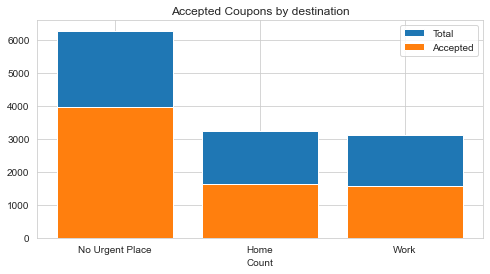

,destination,Total_Count,Accepted,Rejected,Accepted %,Rejected %
1,No Urgent Place,6266,3969,2297,63.342,36.658
0,Home,3230,1635,1595,50.619,49.381
2,Work,3114,1553,1561,49.872,50.128


In [15]:
feature_analysis('destination')

### Coupon Acceptance Rate by 'Destination'
* Customers going to 'No Urgent Place' (63%) have a higher coupon accpetance rate than customers going to 'Home' (50.6%) OR 'Work' (49.9%)

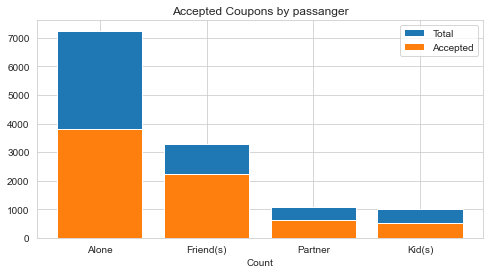

,passanger,Total_Count,Accepted,Rejected,Accepted %,Rejected %
0,Alone,7248,3801,3447,52.442,47.558
1,Friend(s),3292,2216,1076,67.315,32.685
3,Partner,1069,635,434,59.401,40.599
2,Kid(s),1001,505,496,50.450,49.550


In [16]:
feature_analysis('passanger')

### Coupon Acceptance Rate by 'Passanger' type
* A majority of the respondents go out alone (53%)
* Customers who go out with 'Friends' have the highest coupon acceptance rate (67.3%)

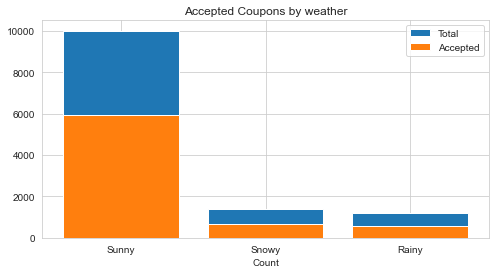

,weather,Total_Count,Accepted,Rejected,Accepted %,Rejected %
2,Sunny,10011,5941,4070,59.345,40.655
1,Snowy,1397,659,738,47.173,52.827
0,Rainy,1202,557,645,46.339,53.661


In [17]:
feature_analysis('weather')

### Coupon Acceptance Rate by 'Weather'
* A majority of the respondents go out when the weather is 'Sunny' (79%)
* Acceptance rate of coupons (59.3%) is also the highest for customers who go out when the weather is 'Sunny'

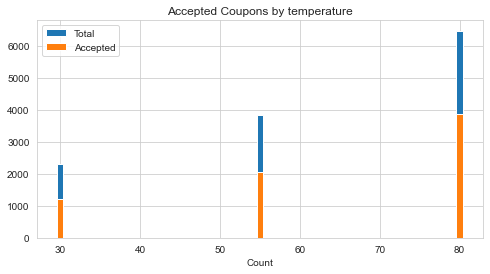

,temperature,Total_Count,Accepted,Rejected,Accepted %,Rejected %
2,80,6475,3876,2599,59.861,40.139
1,55,3830,2056,1774,53.681,46.319
0,30,2305,1225,1080,53.145,46.855


In [18]:
feature_analysis('temperature')

### Coupon Acceptance Rate by 'Temperature'
* A majority of the respondents go out when the temperature is 80F (51.4%)
* Acceptance rate of coupons (59.8%) is also the highest for customers who go out when the temperature is 80F

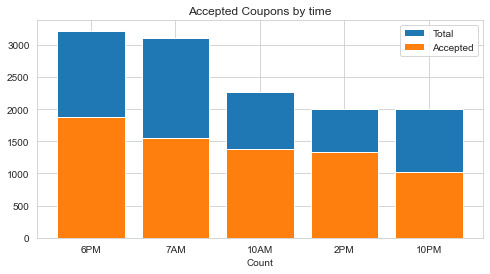

,time,Total_Count,Accepted,Rejected,Accepted %,Rejected %
3,6PM,3220,1881,1339,58.416,41.584
4,7AM,3114,1553,1561,49.872,50.128
0,10AM,2271,1380,891,60.766,39.234
2,2PM,2006,1327,679,66.152,33.848
1,10PM,1999,1016,983,50.825,49.175


In [19]:
feature_analysis('time')

### Coupon Acceptance Rate by 'Time'
* A majority of the respondents are driving at 6PM (presuambly after-work) or 7AM (presumably (driving to work)
* Acceptance rate of coupons is the highest for customers driving at 2PM (66%) OR 10AM (60%)

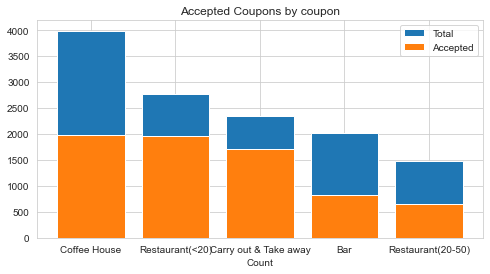

,coupon,Total_Count,Accepted,Rejected,Accepted %,Rejected %
2,Coffee House,3989,1989,2000,49.862,50.138
4,Restaurant(<20),2779,1967,812,70.781,29.219
1,Carry out & Take away,2344,1720,624,73.379,26.621
0,Bar,2010,824,1186,40.995,59.005
3,Restaurant(20-50),1488,657,831,44.153,55.847


In [20]:
feature_analysis('coupon')

### Coupon Acceptance Rate by 'Establishment Type'
* A majority of the coupons are offered by coffee houses (32%)
* Acceptance rate of coupons is the highest for carry out & take away (73.3%) AND restaurants (<20) (70.8%)

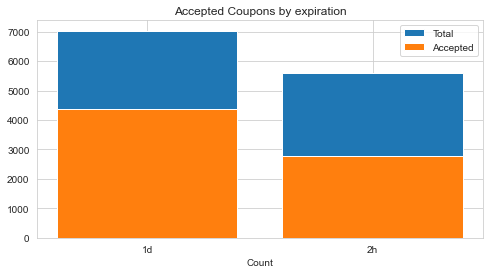

,expiration,Total_Count,Accepted,Rejected,Accepted %,Rejected %
0,1d,7031,4390,2641,62.438,37.562
1,2h,5579,2767,2812,49.597,50.403


In [21]:
feature_analysis('expiration')

### Coupon Acceptance Rate by 'Expiration Window'
* A majority of the coupons are offered with a 1d expiration window (56%) and 1d coupons also have the highest acceptance rate (62.4%)

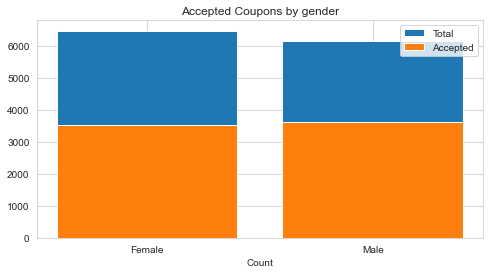

,gender,Total_Count,Accepted,Rejected,Accepted %,Rejected %
0,Female,6469,3535,2934,54.645,45.355
1,Male,6141,3622,2519,58.981,41.019


In [22]:
feature_analysis('gender')

### Coupon Acceptance Rate by 'Gender'
* Males have a slightly higher acceptance rate (58.9%) than Females (54.6%)

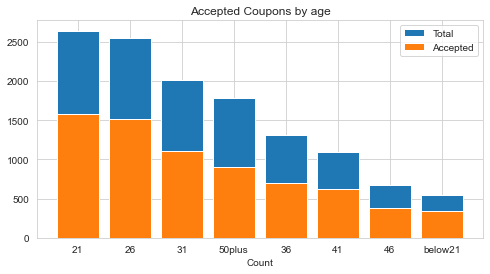

,age,Total_Count,Accepted,Rejected,Accepted %,Rejected %
0,21,2642,1579,1063,59.765,40.235
1,26,2548,1517,1031,59.537,40.463
2,31,2019,1102,917,54.581,45.419
6,50plus,1781,903,878,50.702,49.298
3,36,1317,705,612,53.531,46.469
4,41,1089,623,466,57.208,42.792
5,46,670,384,286,57.313,42.687
7,below21,544,344,200,63.235,36.765


In [23]:
feature_analysis('age')

### Coupon Acceptance Rate by 'Age'
* Respondents between ages 21-31 account for ~57% of total responses AND have a coupon acceptance rate of 58.2%
* Respondents under the age of 21 have the highest coupon acceptance rate (63.2%) across all age groups

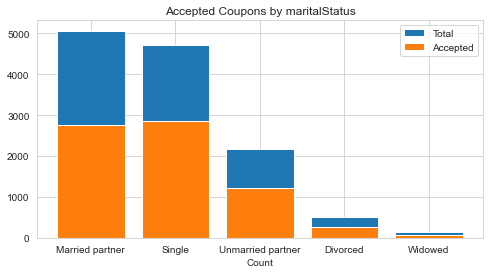

,maritalStatus,Total_Count,Accepted,Rejected,Accepted %,Rejected %
1,Married partner,5068,2749,2319,54.242,45.758
2,Single,4716,2851,1865,60.454,39.546
3,Unmarried partner,2185,1226,959,56.110,43.890
0,Divorced,511,269,242,52.642,47.358
4,Widowed,130,62,68,47.692,52.308


In [24]:
feature_analysis('maritalStatus')

### Coupon Acceptance Rate by 'Marital Status'
* Respondents who are either 'Single' (60%) OR are 'unmarried with a partner' (56.1%) have the highest coupon acceptance rates

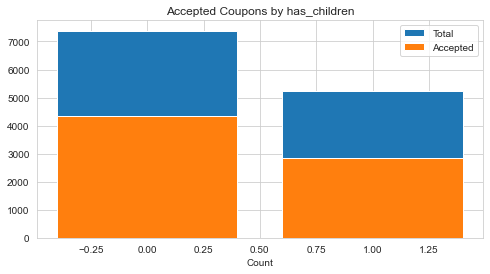

,has_children,Total_Count,Accepted,Rejected,Accepted %,Rejected %
0,0,7383,4329,3054,58.635,41.365
1,1,5227,2828,2399,54.104,45.896


In [25]:
feature_analysis('has_children')

### Coupon Acceptance Rate by 'Children'
* Respondents who don't have children (58.6%) have the highest coupon acceptance rates

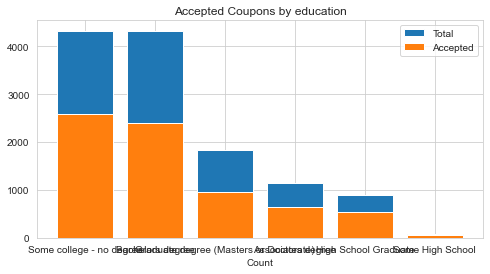

,education,Total_Count,Accepted,Rejected,Accepted %,Rejected %
5,Some college - no degree,4325,2577,1748,59.584,40.416
1,Bachelors degree,4323,2395,1928,55.401,44.599
2,Graduate degree (Masters or Doctorate),1827,956,871,52.326,47.674
0,Associates degree,1148,634,514,55.226,44.774
3,High School Graduate,899,532,367,59.177,40.823
4,Some High School,88,63,25,71.591,28.409


In [26]:
feature_analysis('education')

### Coupon Acceptance Rate by 'Education'
* Respondents who have 'some college education - no degree' have the highest coupon acceptance rate followed by those who have a 'Bachelors degree' (55.4%)

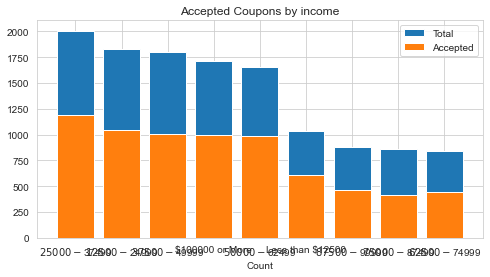

,income,Total_Count,Accepted,Rejected,Accepted %,Rejected %
2,$25000 - $37499,2006,1190,816,59.322,40.678
1,$12500 - $24999,1825,1047,778,57.370,42.630
3,$37500 - $49999,1795,1010,785,56.267,43.733
0,$100000 or More,1717,992,725,57.775,42.225
4,$50000 - $62499,1655,984,671,59.456,40.544
8,Less than $12500,1034,612,422,59.188,40.812
7,$87500 - $99999,879,465,414,52.901,47.099
6,$75000 - $87499,856,414,442,48.364,51.636
5,$62500 - $74999,843,443,400,52.550,47.450


In [27]:
feature_analysis('income')

### Coupon Acceptance Rate by 'Income'
* Respondents with income in the range 'less than 12500' (59.2%) AND '25000-37499' (59.3%) have the highest coupon acceptance rate
* Interstingly, respondents in the higher income brackets '100000 or More' also had high coupon acceptance rates (57.8%)

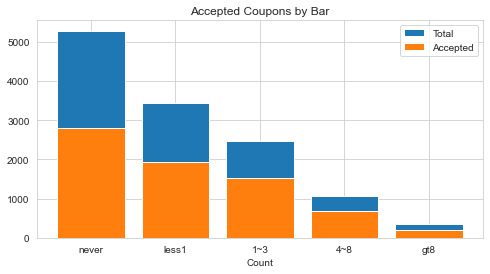

,Bar,Total_Count,Accepted,Rejected,Accepted %,Rejected %
4,never,5285,2806,2479,53.094,46.906
3,less1,3438,1936,1502,56.312,43.688
0,1~3,2468,1533,935,62.115,37.885
1,4~8,1071,681,390,63.585,36.415
2,gt8,348,201,147,57.759,42.241


In [28]:
feature_analysis('Bar')

/Users/anigma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar vs Coupon (Acceptance Rate)')

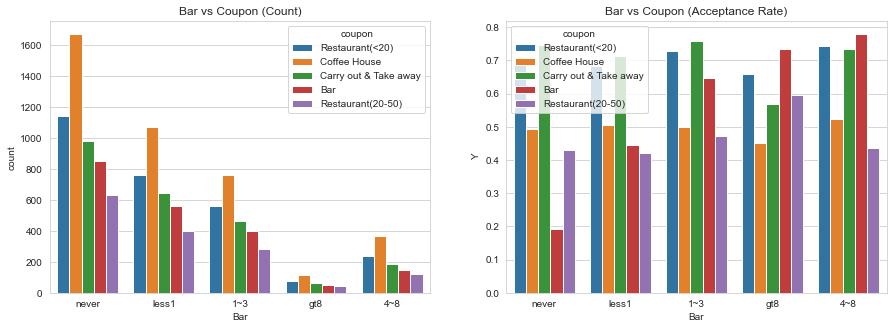

In [29]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['Bar'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="Bar", y="Y", hue='coupon', ci=None, data=data)
axes[0].set_title('Bar vs Coupon (Count)'); axes[1].set_title('Bar vs Coupon (Acceptance Rate)')

In [30]:
df = bivariate_analysis('Bar','coupon',data.Bar,data.coupon,13)
df[df.coupon == 'Bar']

,Bar,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
23,4~8,Bar,150,117,33,78.000,22.000
18,gt8,Bar,49,36,13,73.469,26.531
13,1~3,Bar,397,257,140,64.736,35.264
8,less1,Bar,563,250,313,44.405,55.595
3,never,Bar,851,164,687,19.271,80.729


### Coupon Acceptance Rate on 'Bar Coupons'
* A majority of the respondents either never visited a bar OR visited a bar less than once
* Respondents who visited the bar between '1-3' (62.1%) times AND '4-8' (63.5%) times had high coupon acceptance rates
* Respondents who visited the bar between '4-8' (78.0%) times AND 'gt8' (73.5%) times had high BAR coupon acceptance rates

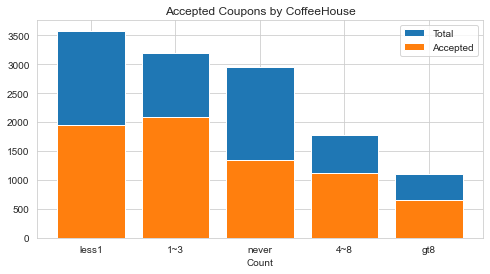

,CoffeeHouse,Total_Count,Accepted,Rejected,Accepted %,Rejected %
3,less1,3579,1949,1630,54.457,45.543
0,1~3,3199,2089,1110,65.302,34.698
4,never,2946,1348,1598,45.757,54.243
1,4~8,1779,1125,654,63.238,36.762
2,gt8,1107,646,461,58.356,41.644


In [31]:
feature_analysis('CoffeeHouse')

/Users/anigma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CoffeeHouse vs Coupon (Acceptance Rate)')

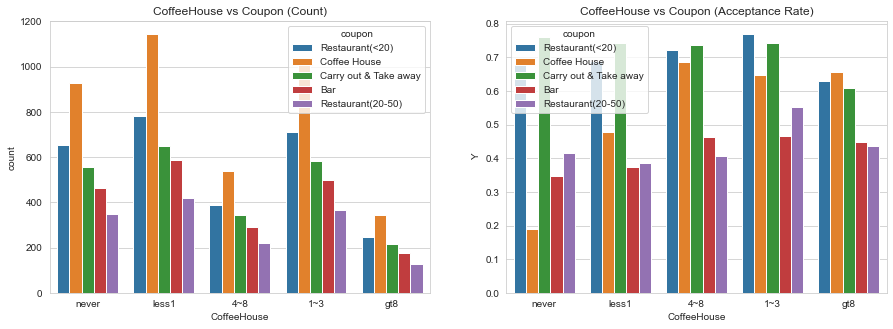

In [32]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['CoffeeHouse'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="CoffeeHouse", y="Y", hue='coupon', ci=None, data=data)
axes[0].set_title('CoffeeHouse vs Coupon (Count)'); axes[1].set_title('CoffeeHouse vs Coupon (Acceptance Rate)')

In [33]:
df = bivariate_analysis('CoffeeHouse','coupon',data.CoffeeHouse,data.coupon,13)
df[df.coupon == 'Coffee House']

,CoffeeHouse,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
11,4~8,Coffee House,538,369,169,68.587,31.413
21,gt8,Coffee House,342,225,117,65.789,34.211
16,1~3,Coffee House,1038,672,366,64.740,35.260
6,less1,Coffee House,1144,548,596,47.902,52.098
1,never,Coffee House,927,175,752,18.878,81.122


### Coupon Acceptance Rate on 'Coffee House Coupons'
* A majority of the respondents have visited a coffee house at least once
* Respondents who visited the coffee house between '1-3' (65.3%) times AND '4-8' (63.2%) times had high coupon acceptance rates
* Respondents who visited the coffee house between '4-8' (68.6%) times AND 'gt8' (65.8%) times had high coffee house coupon acceptance rates

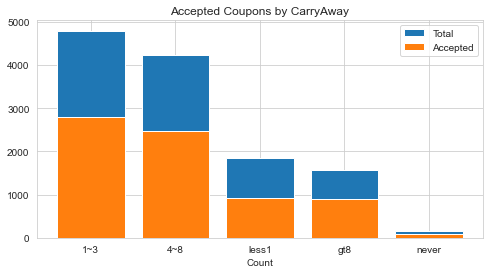

,CarryAway,Total_Count,Accepted,Rejected,Accepted %,Rejected %
0,1~3,4795,2793,2002,58.248,41.752
1,4~8,4242,2462,1780,58.039,41.961
3,less1,1849,921,928,49.811,50.189
2,gt8,1572,900,672,57.252,42.748
4,never,152,81,71,53.289,46.711


In [34]:
feature_analysis('CarryAway')

/Users/anigma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CarryAway vs Coupon (Acceptance Rate)')

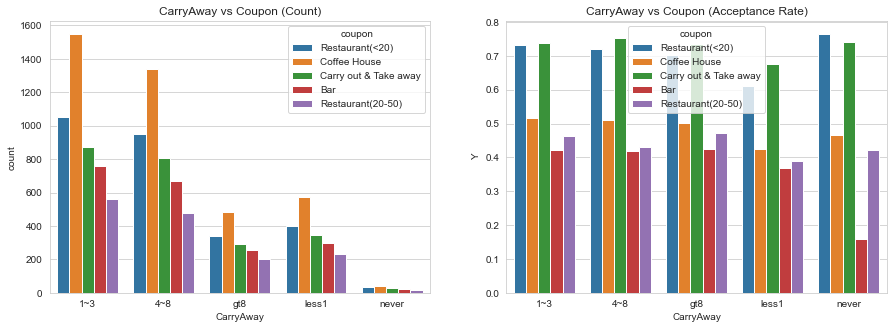

In [35]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['CarryAway'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="CarryAway", y="Y", hue='coupon', ci=None, data=data)
axes[0].set_title('CarryAway vs Coupon (Count)'); axes[1].set_title('CarryAway vs Coupon (Acceptance Rate)')

In [36]:
df = bivariate_analysis('CarryAway','coupon',data.CarryAway,data.coupon,13)
df[df.coupon == 'Carry out & Take away']

,CarryAway,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
7,4~8,Carry out & Take away,804,606,198,75.373,24.627
22,never,Carry out & Take away,31,23,8,74.194,25.806
2,1~3,Carry out & Take away,870,642,228,73.793,26.207
12,gt8,Carry out & Take away,293,215,78,73.379,26.621
17,less1,Carry out & Take away,346,234,112,67.630,32.370


### Observations
* A majority of the respondents have visited a Carry Away at least once
* Respondents who visited the Carry Away between '1-3' (58.2%) times AND '4-8' (58.0%) times had high coupon acceptance rates
* Respondents who visited the Carry Away between '4-8' (75.4%) times AND '1-3' (73.8%) times had high Carry Away coupon acceptance rates

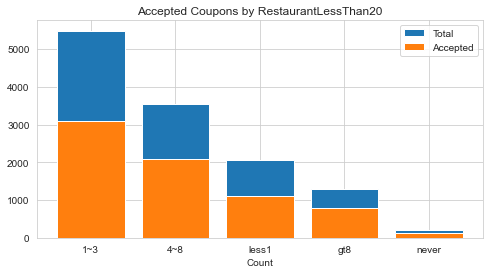

,RestaurantLessThan20,Total_Count,Accepted,Rejected,Accepted %,Rejected %
0,1~3,5485,3083,2402,56.208,43.792
1,4~8,3553,2075,1478,58.401,41.599
3,less1,2071,1103,968,53.259,46.741
2,gt8,1282,779,503,60.764,39.236
4,never,219,117,102,53.425,46.575


In [37]:
feature_analysis('RestaurantLessThan20')

/Users/anigma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'RestaurantLessThan20 vs Coupon (Acceptance Rate)')

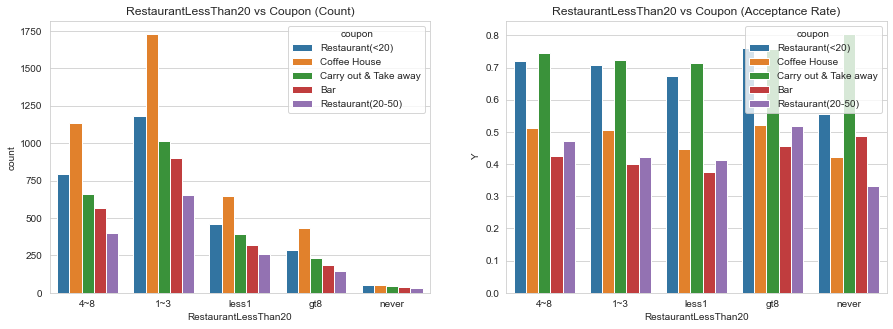

In [38]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['RestaurantLessThan20'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="RestaurantLessThan20", y="Y", hue='coupon', ci=None, data=data)
axes[0].set_title('RestaurantLessThan20 vs Coupon (Count)'); axes[1].set_title('RestaurantLessThan20 vs Coupon (Acceptance Rate)')

In [39]:
df = bivariate_analysis('RestaurantLessThan20','coupon',data.RestaurantLessThan20,data.coupon,13)
df[df.coupon == 'Restaurant(<20)']

,RestaurantLessThan20,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
15,gt8,Restaurant(<20),288,219,69,76.042,23.958
0,4~8,Restaurant(<20),795,572,223,71.950,28.050
5,1~3,Restaurant(<20),1184,837,347,70.693,29.307
10,less1,Restaurant(<20),458,309,149,67.467,32.533
20,never,Restaurant(<20),54,30,24,55.556,44.444


### Observations
* A majority of the respondents have visited a 'Restaurant Less Than 20' at least once
* Respondents who visited a 'Restaurant Less Than 20' 'more than 8' (60.7%), '4-8' (58.4%) times AND '1-3' (56.2%) times had high coupon acceptance rates
* Respondents who visited a 'Restaurant Less Than 20' 'more than 8' (76.0%), '4-8' (71.9%) times AND '1-3' (70.7%) times had high Restaurant Less Than 20 coupon acceptance rates

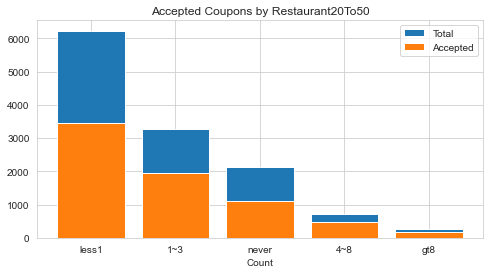

,Restaurant20To50,Total_Count,Accepted,Rejected,Accepted %,Rejected %
3,less1,6230,3468,2762,55.666,44.334
0,1~3,3266,1942,1324,59.461,40.539
4,never,2122,1095,1027,51.602,48.398
1,4~8,728,477,251,65.522,34.478
2,gt8,264,175,89,66.288,33.712


In [40]:
feature_analysis('Restaurant20To50')

/Users/anigma/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurant20To50 vs Coupon (Acceptance Rate)')

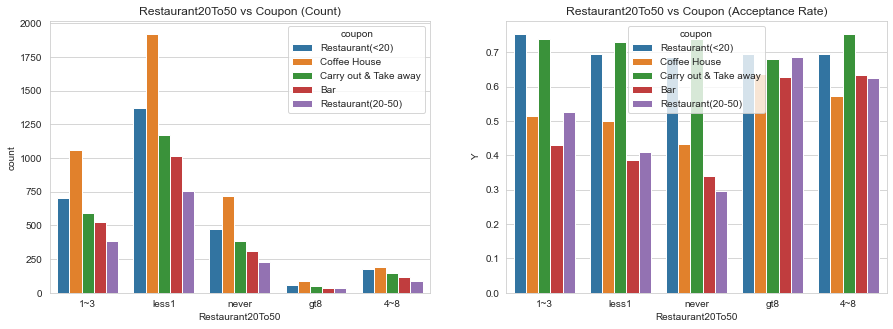

In [41]:
fig,axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data['Restaurant20To50'],hue=data['coupon'],ax=axes[0])
sns.barplot(ax=axes[1], x="Restaurant20To50", y="Y", hue='coupon', ci=None, data=data)
axes[0].set_title('Restaurant20To50 vs Coupon (Count)'); axes[1].set_title('Restaurant20To50 vs Coupon (Acceptance Rate)')

In [42]:
df = bivariate_analysis('Restaurant20To50','coupon',data.Restaurant20To50,data.coupon,13)
df[df.coupon == 'Restaurant(20-50)']

,Restaurant20To50,coupon,Total_Count,Accepted,Rejected,%Accepted,%Rejected
19,gt8,Restaurant(20-50),32,22,10,68.750,31.250
24,4~8,Restaurant(20-50),91,57,34,62.637,37.363
4,1~3,Restaurant(20-50),381,201,180,52.756,47.244
9,less1,Restaurant(20-50),754,309,445,40.981,59.019
14,never,Restaurant(20-50),230,68,162,29.565,70.435


### Observations
* A majority of the respondents have visited a 'Restaurant20to50' less than once
* Respondents who visited a 'Restaurant20to50' '1-3' (59.4%) times had high coupon acceptance rates
* Respondents who visited a 'Restaurant20to50' 'gt8' (68.75%) times AND '4-8' times (62.6%) had high Restaurant20to50 coupon acceptance rates

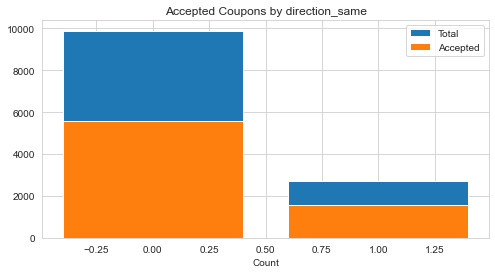

,direction_same,Total_Count,Accepted,Rejected,Accepted %,Rejected %
0,0,9892,5576,4316,56.369,43.631
1,1,2718,1581,1137,58.168,41.832


In [43]:
feature_analysis('direction_same')

### Observations
* A majority of the coupons are NOT in 'the same direction' as the respondent's destination
* Coupon acceptance rate is slightly higher when the coupon offered is in 'the same direction' as the respondent's destination